# Dataset stats, checking

In [135]:
import numpy as np
from helper_methods import *
from itertools import chain

import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
import pickle
import torch
from torch import nn
from torch.nn import Module, Parameter
import torch.nn.functional as F

In [2]:
def compute_stats(train, test):
    ses_tr_len = [len(ses)+1 for ses in train[0]]
    ses_te_len = [len(ses)+1 for ses in test[0]]
    ses_len = ses_tr_len + ses_te_len
    avg_len = sum(ses_len)/len(ses_len)
    unique = set(chain.from_iterable(train[0] + test[0]))
    return sum(ses_len), len(ses_tr_len), len(ses_te_len), len(unique), avg_len

def distrib_stats(train, test):
    ses_tr_len = [len(ses)+1 for ses in train[0]]
    ses_te_len = [len(ses)+1 for ses in test[0]]
    ses_len = ses_tr_len + ses_te_len
    avg_len = sum(ses_len)/len(ses_len)
    unique = set(chain.from_iterable(train[0] + test[0]))
    frequency = list(chain.from_iterable(train[0] + test[0]))

    popularity_dict = {i:frequency.count(i) for i in set(frequency)}
    return frequency, popularity_dict

def print_stats(ses_len, ses_tr_len, ses_te_len, unique, avg_len):    
    print(f"|| DIGINETICA STATS || \
          \n# of clicks: {ses_len} \
          \n# of training sessions: {ses_tr_len} \
          \n# of test sessions: {ses_te_len} \
          \n# of items: {unique} \
          \n# Average length: {avg_len}")

In [3]:
digi_train = pickle.load(open('../datasets/diginetica/train.txt', 'rb'))
digi_test = pickle.load(open('../datasets/diginetica/test.txt', 'rb'))

In [4]:
yoo64_train = pickle.load(open('../datasets/yoochoose1_64/train.txt', 'rb'))
yoo64_test = pickle.load(open('../datasets/yoochoose1_64/test.txt', 'rb'))

In [5]:
all_sessions = digi_train[0] + digi_test[0]

In [6]:
all_sessions_set = [set(ses) for ses in all_sessions]

In [95]:
def intersecting_sets(sets):
    G = nx.Graph()
    # Nodes of the graph should be hashable
    sets_1 = map(frozenset, sets)
    #print(set(sets))
    for to_node in sets_1:
        sets_2 = map(frozenset, sets)
        for from_node in sets_2:
            # off-course you don't want a self loop
            # and only interested in intersecting nodes 
            if to_node != from_node and to_node & from_node:
                G.add_edge(from_node, to_node)
    # and remember to convert the frozen sets to sets
    return [map(set, lst) for lst in nx.connected_components(G)], G

In [41]:
con_components, G = intersecting_sets(all_sessions_set)

KeyboardInterrupt: 

In [130]:
def check_alls(sets):
    distinct_sets = [sets[0]]
    for ses in sets:
        added = False
        for i, ses_2 in enumerate(distinct_sets):
            if ses & ses_2:
                unioned = ses | ses_2
                distinct_sets[i] = distinct_sets[i] | unioned
                added = True
        if not added:    
            distinct_sets.append(ses)

    return distinct_sets

In [73]:
distinct_sets = check_alls(all_sessions_set)

In [76]:
d_2 = check_alls(distinct_sets)

In [124]:
len(distinct_sets)

(4325, 141)

In [128]:
len(d_2), len(check_alls(d_2))

(141, 141)

In [129]:
distinct_yoo = check_alls(all_yoo_sets)

KeyboardInterrupt: 

In [87]:
len(distinct_yoo)

4245

In [107]:
d_2[0] & d_2[1]

set()

In [111]:
_, G1 = intersecting_sets(dy_2)

In [119]:
dy_2 = check_alls(dy_2)

In [121]:
len(dy_2),len(check_alls(dy_2))

(1726, 1726)

In [33]:
s_lsts = [{1,2,3,4},{1,4},{6},{6,7}]
_, s_G = intersecting_sets(s_lsts) 

In [19]:
all_sessions_set[0] & all_sessions_set[1]

set()

In [79]:
all_yoo_sets = [set(ses) for ses in yoo64_train[0] + yoo64_test[0]]

In [64]:
_, yoo_G = intersecting_sets(all_yoo_sets)

In [72]:
nx.algorithms.is_connected(G)

True

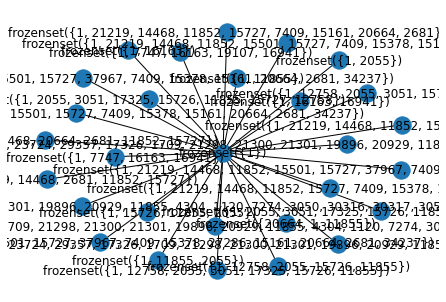

In [102]:
nx.draw(G, with_labels=True)

In [44]:
con_comp_ls = list(con_components[0])

In [140]:
def find_clicks(ses_set, all_sessions):
    clicks = []
    for ses in all_sessions:
        if ses_set & set(ses):
            clicks.extend(ses)
    return clicks

In [161]:
list(map(len, dy_2))

[14900,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 7,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


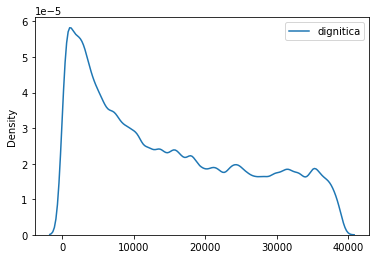

In [162]:
fig, ax = plt.subplots()

sns.kdeplot(find_clicks(d_2[0], all_sessions), shade=False, 
            common_norm=True, label='dignitica', ax=ax)
# sns.kdeplot(dig_pop.values(), shade=True, label='diginetica')
plt.legend()

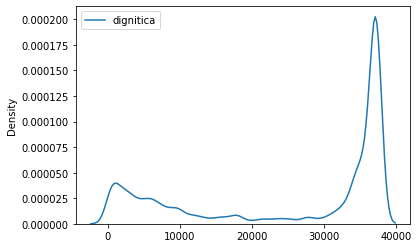

In [163]:
fig, ax = plt.subplots()

sns.kdeplot(find_clicks(dy_2[0], yoo64_train[0] + yoo64_test[0]), shade=False, 
            common_norm=True, label='dignitica', ax=ax)
# sns.kdeplot(dig_pop.values(), shade=True, label='diginetica')
plt.legend()

In [89]:
print_stats(*compute_stats(digi_train,digi_test))

|| DIGINETICA STATS ||           
# of clicks: 3466487           
# of training sessions: 612858           
# of test sessions: 51751           
# of items: 39028           
# Average length: 5.215829156692131


In [66]:
yoochoose1_64_train = pickle.load(open('../datasets/yoochoose1_64/train.txt', 'rb'))
yoochoose1_64_test = pickle.load(open('../datasets/yoochoose1_64/test.txt', 'rb'))

In [90]:
    print_stats(*compute_stats(yoochoose1_64_train, yoochoose1_64_test))

|| DIGINETICA STATS ||           
# of clicks: 2621822           
# of training sessions: 369859           
# of test sessions: 55898           
# of items: 16766           
# Average length: 6.158024412986751


In [71]:
yoochoose1_4_train = pickle.load(open('../datasets/yoochoose1_4/train.txt', 'rb'))
yoochoose1_4_test = pickle.load(open('../datasets/yoochoose1_4/test.txt', 'rb'))

In [91]:
print_stats(*compute_stats(yoochoose1_4_train, yoochoose1_4_test))

|| DIGINETICA STATS ||           
# of clicks: 34097026           
# of training sessions: 5917745           
# of test sessions: 55898           
# of items: 29618           
# Average length: 5.7079115708789425
